## Approximating Costs

In [12]:
import pandas as pd

In [13]:
pandas_v_rapids = pd.read_csv('AWS Results/pandas_v_rapids_results.csv',
                              index_col=0, 
                               header=[0, 1], skipinitialspace=True)

In [14]:
results_df_pandas = pandas_v_rapids['Pandas']
results_df_pandas['Cost'] = results_df_pandas['Average']/3600 * 0.379

/tmp/ipykernel_20762/1447565746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df_pandas['Cost'] = results_df_pandas['Average']/3600 * 0.379


In [15]:
results_df_rapids = pandas_v_rapids['Rapids']
results_df_rapids['Cost'] = results_df_rapids['Average']/3600 * 0.134

/tmp/ipykernel_20762/1903268199.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df_rapids['Cost'] = results_df_rapids['Average']/3600 * 0.134


In [16]:
spark = pd.read_csv('AWS Results/spark_etl_results.csv')

In [17]:
spark['Cost'] = spark['Average']/3600*(3*0.192)

## Vizualization

In [18]:
import os
os.environ[ 'MPLCONFIGDIR' ] = '/tmp/'
import matplotlib.pyplot as plt
import numpy as np

In [19]:
# Defining the plot that is used
def plot(axs, averages_pandas, averages_rapids, averages_spark, test):
    axs.bar(x = ind, 
            height=averages_pandas, 
            width = width, 
            color='royalblue', label='Pandas')

    axs.bar(ind+width, 
                height=averages_rapids, 
                width = width, 
                color='seagreen',label='Rapids')
    
    axs.bar(ind+width+width, 
        height=averages_spark, 
        width = width, 
        color='purple',label='Spark')

    axs.set_ylabel('Average Cost ($)')
    axs.set_xlabel('Data Set Size (GB)')
    axs.set_title(f"Test: {test}",fontweight="bold", fontsize=12)
    axs.legend(loc='upper right')
    axs.set_xticks(ticks=ind + width/2, 
              labels=bar_labels)
    return axs

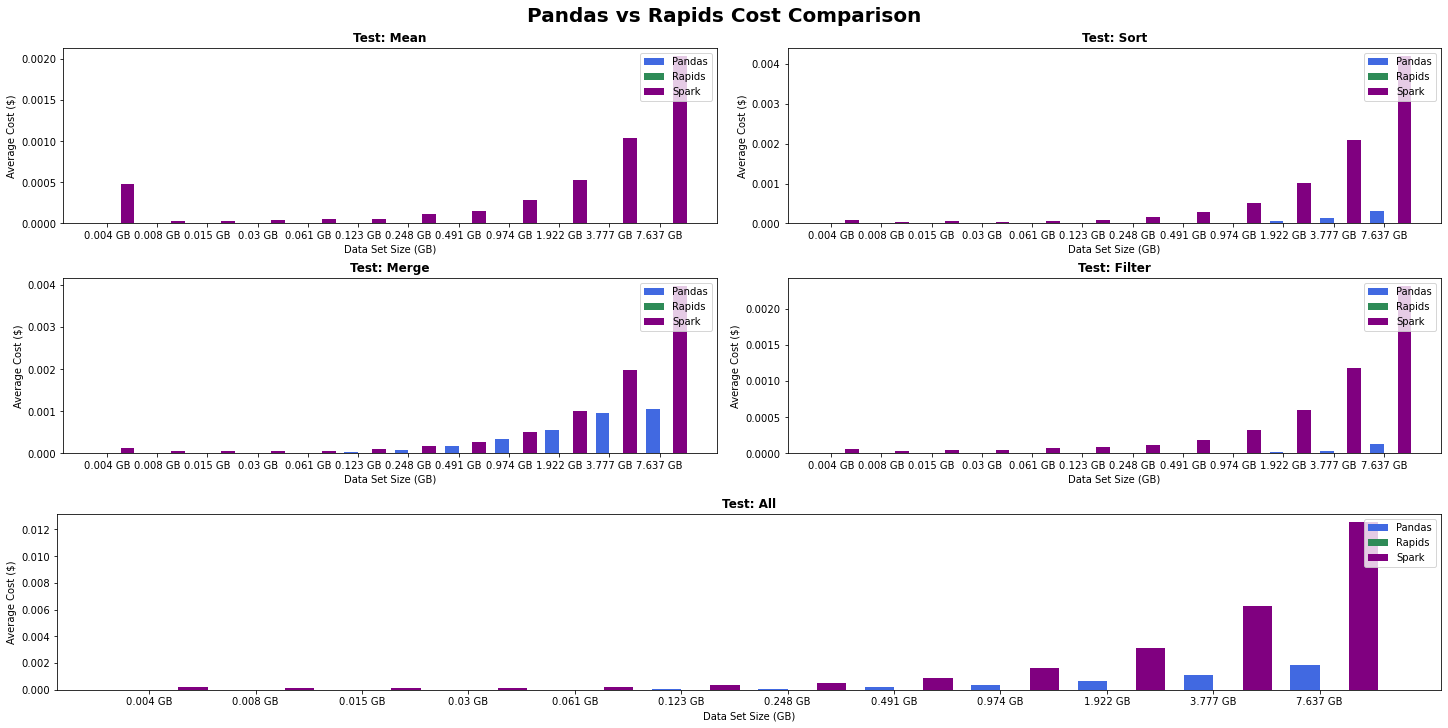

In [25]:
# Creating the plot matrix

NUM_DSIZE_DOUBLINGS = 12

# Computing an array to hold the test names
tests = np.append(results_df_pandas['Test'].drop_duplicates().values,'None').reshape((3,2))

# Defining the figure
fig = plt.figure(constrained_layout=True,figsize=(3,3))
fig.tight_layout(pad=5.0)

fig.suptitle('Pandas vs Rapids Cost Comparison', fontsize=20, fontweight="bold")

# Setting the fig size
fig.set_size_inches(20, 10)

# Creating the subfigures
subfigs = fig.subfigures(2, 1, wspace=1,height_ratios=[2, 1.])
axs = subfigs[0].subplots(2, 2)

# Setting the number of bars
ind = np.arange(0, NUM_DSIZE_DOUBLINGS*2, 2)

# Defining the width between the bars
width = 0.55

# Defining the bar labels
bar_labels = np.round(results_df_pandas['Test Size'].drop_duplicates(), 3).astype(str) + " GB"

# Creating the plots
for i in range(0, 2):
    for j in range(0, 2):
        test = tests[i, j]            
        plot(axs[i,j], 
             results_df_pandas[results_df_pandas['Test'] == test]['Cost'],
             results_df_rapids[results_df_rapids['Test'] == test]['Cost'],
             spark[spark['Test'] == test]['Cost'],
             test)
# Creating the bottom plot since there is an odd number
ax = subfigs[1].subplots(1,1)
plot(ax, 
     results_df_pandas[results_df_pandas['Test'] == 'All']['Cost'],
     results_df_rapids[results_df_rapids['Test'] == 'All']['Cost'],
     spark[spark['Test'] == 'All']['Cost'],
     'All')
plt.savefig('AWS Results/etl_cost.png')

In [26]:
# Defining the plot that is used
def plot_nospark(axs, averages_pandas, averages_rapids, test):
    axs.bar(x = ind, 
            height=averages_pandas, 
            width = width, 
            color='royalblue', label='Pandas')

    axs.bar(ind+width, 
                height=averages_rapids, 
                width = width, 
                color='seagreen',label='Rapids')

    axs.set_ylabel('Average Cost ($)')
    axs.set_xlabel('Data Set Size (GB)')
    axs.set_title(f"Test: {test}",fontweight="bold", fontsize=12)
    axs.legend(loc='upper right')
    axs.set_xticks(ticks=ind + width/2, 
              labels=bar_labels)
    return axs

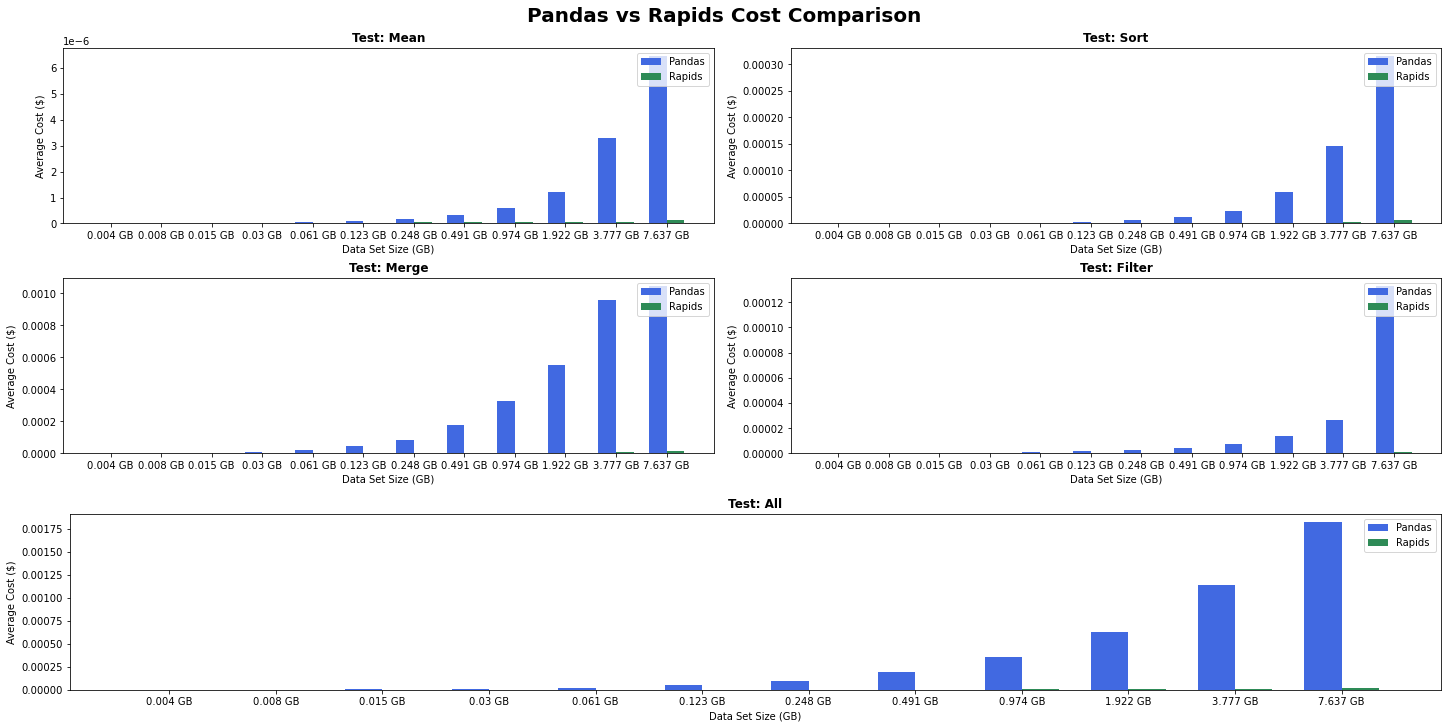

In [27]:
# Creating the plot matrix

NUM_DSIZE_DOUBLINGS = 12

# Computing an array to hold the test names
tests = np.append(results_df_pandas['Test'].drop_duplicates().values,'None').reshape((3,2))

# Defining the figure
fig = plt.figure(constrained_layout=True,figsize=(3,3))
fig.tight_layout(pad=5.0)

fig.suptitle('Pandas vs Rapids Cost Comparison', fontsize=20, fontweight="bold")

# Setting the fig size
fig.set_size_inches(20, 10)

# Creating the subfigures
subfigs = fig.subfigures(2, 1, wspace=1,height_ratios=[2, 1.])
axs = subfigs[0].subplots(2, 2)

# Setting the number of bars
ind = np.arange(0, NUM_DSIZE_DOUBLINGS)

# Defining the width between the bars
width = 0.35

# Defining the bar labels
bar_labels = np.round(results_df_pandas['Test Size'].drop_duplicates(), 3).astype(str) + " GB"

# Creating the plots
for i in range(0, 2):
    for j in range(0, 2):
        test = tests[i, j]            
        plot_nospark(axs[i,j], 
             results_df_pandas[results_df_pandas['Test'] == test]['Cost'],
             results_df_rapids[results_df_rapids['Test'] == test]['Cost'],
             test)
# Creating the bottom plot since there is an odd number
ax = subfigs[1].subplots(1,1)
plot_nospark(ax, 
     results_df_pandas[results_df_pandas['Test'] == 'All']['Cost'],
     results_df_rapids[results_df_rapids['Test'] == 'All']['Cost'],
     'All')
plt.savefig('AWS Results/etl_costs_no_spark.png')